In [ ]:
import pySim_lib as pysim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

plt.rcParams.update({"text.usetex": True})

a = 268
lpt_filename = "2lpt_0000"
nbody_filename = "nbody_0000"

# Load the simulation data
nbody_particles=np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/input/nbody_input/{nbody_filename}.dat')
lpt_particles=np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/input/2lpt_input/{lpt_filename}.dat')
# Extract the positions of the particles
nbody_positions = nbody_particles[:, 0:3]
lpt_positions = lpt_particles[:, 0:3]
# Extract the velocities of the particles
nbody_velocities = nbody_particles[:, 3:6]
lpt_velocities = lpt_particles[:, 3:6]


In [17]:
#load voids
nbody_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/nbody_output/void_{nbody_filename}.dat')
lpt_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/2lpt_output/void_{lpt_filename}.dat')
# Extract the void data
#delete small voids
print("nbody_void_data_incl_small.shape = ", nbody_void_data_incl_small.shape)
a = 268
V_box = a**3
N_particles = len(nbody_particles) 
print("N_particles = ", N_particles)
r_min = (V_box / N_particles)**(1/3) * 2.5
print("r_min = ", r_min)
#filter nbody voids
nbody_radii_incl_small = nbody_void_data_incl_small[:, 0] 
nbody_coords_incl_small = nbody_void_data_incl_small[:, 1:4]
nbody_allowed = nbody_radii_incl_small > r_min  

nbody_radii = nbody_radii_incl_small[nbody_allowed]
nbody_coords = nbody_coords_incl_small[nbody_allowed]
nbody_void_data = np.column_stack((nbody_radii, nbody_coords))

#filter lpt voids
lpt_radii_incl_small = lpt_void_data_incl_small[:, 0]
lpt_coords_incl_small = lpt_void_data_incl_small[:, 1:4]
lpt_allowed = lpt_radii_incl_small > r_min

lpt_radii = lpt_radii_incl_small[lpt_allowed]
lpt_coords = lpt_coords_incl_small[lpt_allowed]
lpt_void_data = np.column_stack((lpt_radii, lpt_coords))

nbody_void_data_incl_small.shape =  (10262, 11)
N_particles =  2097152
r_min =  5.234375


In [3]:


#read in voids from voidfinder
nbody_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/nbody_output/void_{nbody_filename}.dat')
lpt_void_data_incl_small = np.loadtxt(f'/Users/CHermann/Desktop/MPE/Bachelor_thesis/Sparkling/output/2lpt_output/void_{lpt_filename}.dat')

# Extract the void centers and radii
nbody_void_centers_incl_small = nbody_void_data_incl_small[:, 1:4]
lpt_void_centers_incl_small = lpt_void_data_incl_small[:, 1:4]
nbody_void_radii_incl_small = nbody_void_data_incl_small[:, 0]
lpt_void_radii_incl_small = lpt_void_data_incl_small[:, 0]

#delete small voids
N_particles= len(lpt_particles)
print("N_particles =", N_particles)
V_box = a**3
n_m = N_particles / V_box
print("n_mean =", n_m)
r_min = (V_box / sN_particles)**(1/3) * 2.5

lpt_voids_allowed = lpt_void_radii_incl_small > r_min  
nbody_voids_allowed = nbody_void_radii_incl_small > r_min

nbody_void_radii = nbody_void_radii_incl_small[nbody_voids_allowed]
lpt_void_radii = lpt_void_radii_incl_small[lpt_voids_allowed]
nbody_void_centers = nbody_void_centers_incl_small[nbody_voids_allowed]
lpt_void_centers = lpt_void_centers_incl_small[lpt_voids_allowed]

nbody_void_data = np.column_stack((nbody_void_radii, nbody_void_centers))
lpt_void_data = np.column_stack((lpt_void_radii, lpt_void_centers))

N_particles = 2097152
n_mean = 0.10894957158959047


NameError: name 'sN_particles' is not defined

Text(0.5, 1.0, 'Comparison Of The Void Size Functions Of 2LPT And Nbody')

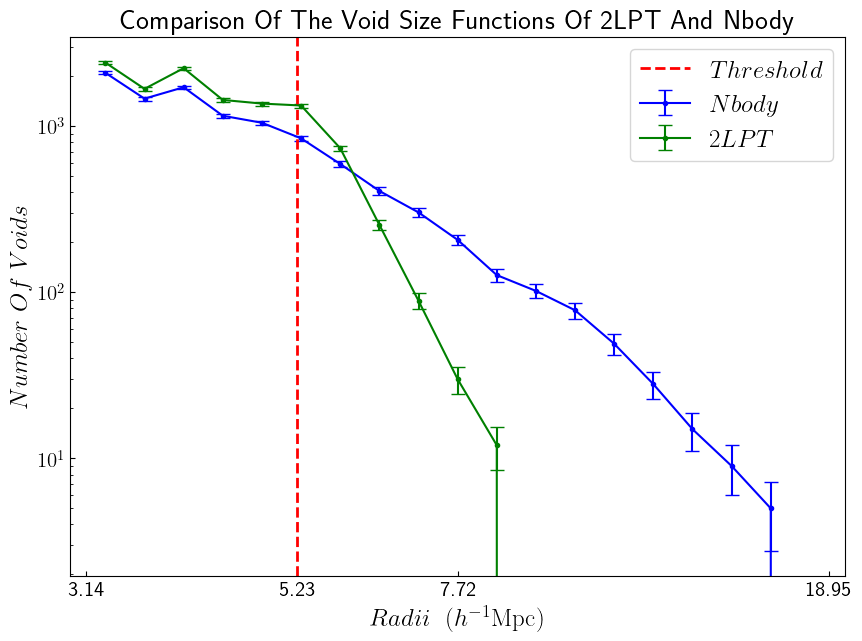

In [18]:
#compare void size function of 2lpt and nbody
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)

bins = np.logspace(np.log10(min(nbody_void_radii_incl_small)), np.log10(max(nbody_void_radii_incl_small)), 20)

hist_nbody, bin_edges_nbody= np.histogram(nbody_void_radii_incl_small, bins=bins)
bin_centers = np.sqrt(bin_edges_nbody[:-1] * bin_edges_nbody[1:])
errors_nbody = np.sqrt(hist_nbody)
ax.errorbar(bin_centers, hist_nbody, yerr=errors_nbody, fmt='o', color='blue', linestyle='-', capsize=5, markersize=3, label='$Nbody$')

hist_lpt, bin_edges_lpt= np.histogram(lpt_void_radii_incl_small, bins=bins)
bin_centers = np.sqrt(bin_edges_lpt[:-1] * bin_edges_lpt[1:])
errors_lpt = np.sqrt(hist_lpt)
ax.errorbar(bin_centers, hist_lpt, yerr=errors_lpt, fmt='o', color='green', linestyle='-', capsize=5, markersize=3, label='$2LPT$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)

ticks = np.logspace(np.log10(min(nbody_void_radii_incl_small)), np.log10(max(nbody_void_radii_incl_small)), 3)
ticks = np.append(ticks, r_min)  
ax.set_xticks(ticks)
ax.set_xticks([], minor=True)  # delete Minor-Ticks, falls nötig
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}".rstrip('0').rstrip('.')))  

ax.axvline(x=r_min, color='red', linestyle='--', linewidth=2, label='$Threshold$')
plt.legend(fontsize = 18)

plt.xlabel('$Radii$  \ $(h^{-1}  \mathrm{Mpc})$', fontsize = 18)
plt.ylabel('$Number \ Of \ Voids$', fontsize = 18)
plt.title('Comparison Of The Void Size Functions Of 2LPT And Nbody', fontsize = 20)

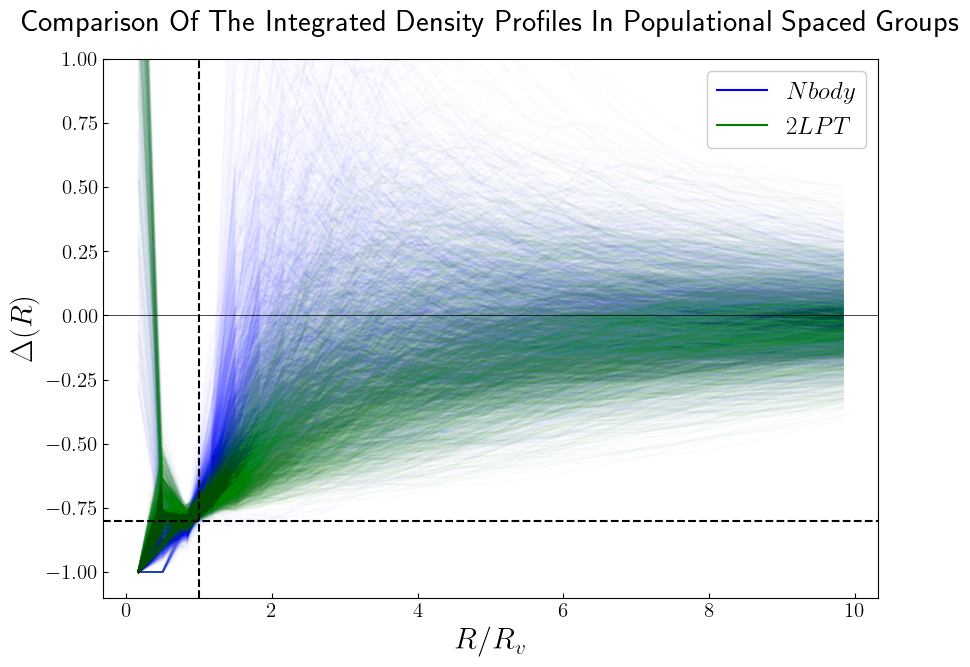

In [20]:
#compare integrated density profiles of 2lpt and nbody
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 1)

r_max = np.min([np.max(nbody_radii), np.max(lpt_radii)])
limits = [r_min] + [r_max]
limits = [round(float(i), 1) for i in limits]
nbody_profiles_list = []
lpt_profiles_list = []

scaled_bins = np.linspace(0, 10, 31)  # 30 bins
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

nbody_data_delta_profiles_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/Nbody_results/Numpy_files/{nbody_filename}_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
lpt_data_delta_profiles_groups = np.load(f"/Users/CHermann/Desktop/MPE/Bachelor_thesis/2LPT_results/Numpy_files/{lpt_filename}_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
nbody_delta_profiles_groups, nbody_void_radii_groups = nbody_data_delta_profiles_groups
lpt_delta_profiles_groups, lpt_void_radii_groups = lpt_data_delta_profiles_groups

for group in nbody_delta_profiles_groups:
      for r, delta in zip(nbody_void_radii_groups[group], nbody_delta_profiles_groups[group]):
        if r > r_min and r < r_max:
            nbody_profiles_list.append(np.squeeze(delta))
            ax.plot(scaled_bin_centers, np.squeeze(delta), marker='None', alpha=0.01, linestyle='-', color="blue")

for group in lpt_delta_profiles_groups:
      for r, delta in zip(lpt_void_radii_groups[group], lpt_delta_profiles_groups[group]):
        if r > r_min and r < r_max:
            lpt_profiles_list.append(np.squeeze(delta))
            ax.plot(scaled_bin_centers, np.squeeze(delta), marker='None', alpha=0.02, linestyle='-', color="green")
            
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')
plt.title('Comparison Of The Integrated Density Profiles In Populational Spaced Groups', fontsize=22, pad=20)
plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

legend_handles = [ax.plot([], [], color="blue", linestyle='-', label='$Nbody$', alpha=1)[0], ax.plot([], [], color="green", linestyle='-', label='$2LPT$', alpha=1)[0]]
ax.legend(handles=legend_handles, fontsize=18, framealpha=1)

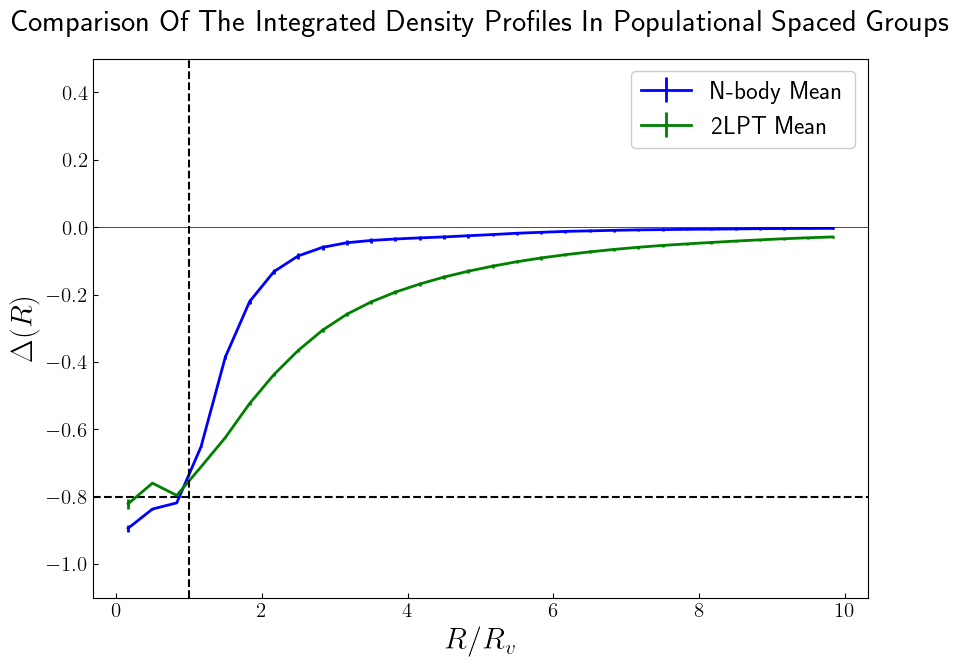

In [ ]:
#means
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 0.5)

nbody_mean_profile = np.mean(nbody_profiles_list, axis=0)
nbody_std_delta_profile = np.std(nbody_profiles_list, axis=0) / np.sqrt(len(nbody_profiles_list))
lpt_mean_profile = np.mean(lpt_profiles_list, axis=0)
lpt_std_delta_profile = np.std(lpt_profiles_list, axis=0) / np.sqrt(len(lpt_profiles_list))
ax.errorbar(scaled_bin_centers, nbody_mean_profile, yerr=nbody_std_delta_profile, linestyle='-', color="blue", linewidth=2, label="N-body Mean")
ax.errorbar(scaled_bin_centers, lpt_mean_profile, yerr=lpt_std_delta_profile, linestyle='-', color="green", linewidth=2, label="2LPT Mean")

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')

plt.title('Comparison Of The Integrated Density Profiles In Populational Spaced Groups', fontsize=22, pad=20)
plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

# Legende aktualisieren
ax.legend(fontsize=18, framealpha=1)